# Курсовая работа — Методы машинного обучения (Метод опорных векторов)

## **Любченко — Вариант 15**

#### Подготовка исходных данных (Луны)

Импортирование необходимых библиотек и инструментов

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm  import  SVC
from sklearn.model_selection import GridSearchCV

from useful_functions import plot_decision_regions

Конфигурация исходных данных для задачи классификации

In [ ]:
X, y = make_moons(n_samples=512, random_state=123, noise=0.18)

Отображение исходных данных

In [ ]:
plt.figure(1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red',
                marker='^', alpha=0.5, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue',
                marker='o', alpha=0.5, label='1')
plt.legend()
plt.title("Исходные данные (Луны)")
plt.show()

Pазделение данных на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=0)

#### Работа с моделью

Подбор наилучших гиперпараметров

In [47]:
params_for_search = {
    'degree': [2, 3],
    'C': np.logspace(-2, 2, num=20),
    'gamma': ['auto'],
    'kernel':['poly'],
    'coef0': np.arange(0, 2, 0.5),
}

svm = SVC()
search = GridSearchCV(svm, params_for_search, n_jobs=-1, scoring='roc_auc')
search.fit(X_train, y_train)

cvres = search.cv_results_
best_params = search.best_params_

Вывод средней доли правильных прогнозов при различных комбинациях 

In [ ]:
for maen_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(maen_score,  params)

Вывод лучших параметров

In [42]:
print(f"CV best score = {search.best_score_}")
print(f"CV error = {1 - search.best_score_}")
print(f"best C = {search.best_estimator_.C}")
print(f"best degree = {search.best_estimator_.degree}")
print(f"coef0 = {search.best_estimator_.coef0}")

CV best score = 0.9954761904761906
CV error = 0.0045238095238093745
best C = 37.92690190732246
best degree = 3
coef0 = 1.0


Обучение оптимизированной модели

In [48]:
svm_best = search.best_estimator_

print("Модель bestSVM:",
      "\n   kernel=", svm_best.kernel,
      "\n   C=",      svm_best.C,
      "\n   gamma=",  svm_best.gamma,
      "\n   degree=", svm_best.degree)

svm_best.fit(X_train, y_train)

Модель bestSVM: 
   kernel= poly 
   C= 37.92690190732246 
   gamma= auto 
   degree= 3


SVC(C=np.float64(37.92690190732246), coef0=np.float64(1.0), gamma='auto',
    kernel='poly')

Ошибки обучения на обучающей и тестовой выборках

In [50]:
err_train = np.mean(y_train != svm_best.predict(X_train))
err_test = np.mean(y_test != svm_best.predict(X_test))
print(f"{err_train =: };\n{err_test =: }")

err_train = 0.04189944134078212;
err_test = 0.012987012987012988


Постороение графика области решений

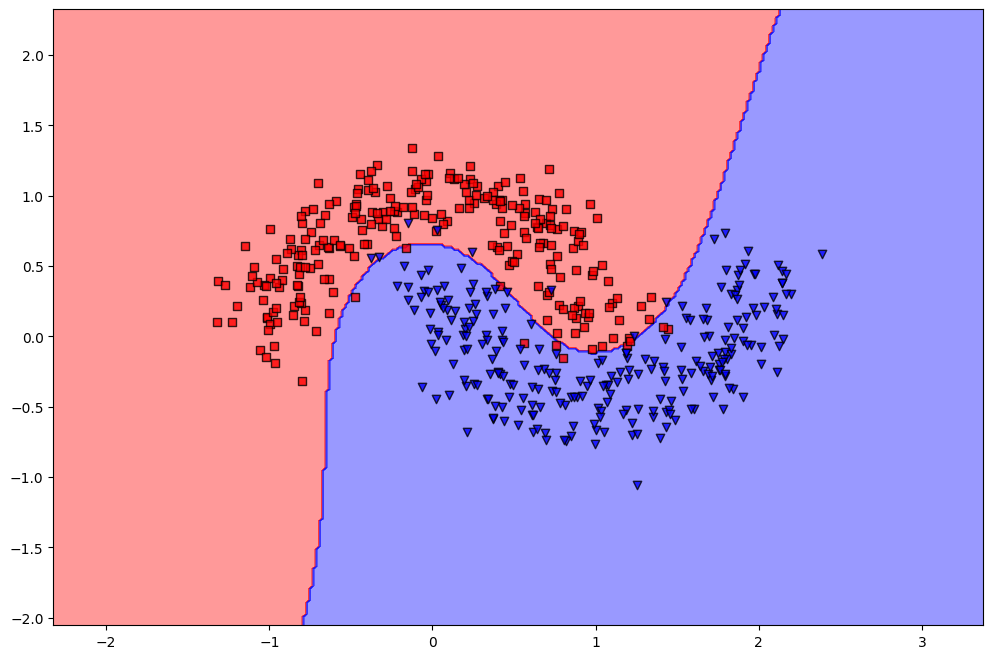

In [49]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(12, 8)) 
plot_decision_regions(X_combined, y_combined,
                      classifier=svm_best)
plt.show()